In [1]:
import pandas as pd
import numpy as np
import h5py
from tqdm import trange
from preprocessing import * 

/opt/apps/rhel7/Python-GPU-3.6.5/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
# MGI_Mammalian_Phenotype_Level_4_2019.txt, GO_Biological_Process_2018.txt, KEGG_2019_Human.txt
file_name = "KEGG_2019_Human.txt"
curr_name = "kegg_"

# Preprocessing 

Converting the text file into a dictionary in which each phenotype is a key and its associated genes are in a list as a value.

In [14]:
d = {} 
with open(file_name) as file:
    for line in file:
        lst = line.strip().split("\t")
        ph = lst[0]
        lst = lst[2:]
        d[ph] = lst

Creating the reverse of the above dictionary, in which each gene is a key and its value is a list of its associated phenotypes.

In [15]:
gene_dict = {}
for k,v in d.items(): 
    for gene in v: 
        if gene not in gene_dict: 
            gene_dict[gene] = []
        gene_dict[gene].append(k)

Create a list of functions and genes in the correct index order for the gene set matrix, which is a binary matrix with genes as rows and functions or phenotypes as columns. If the gene is associated with a phenotype, the corresponding cells receives a value of 1. Otherwise, the cell receives a value of 0.
It is possible to use a list of keys since Python dictionaries are unordered such that their order is dictated by when they were entered rather than their alphanumeric order.

In [16]:
curr_pheno = list(d.keys())
curr_genes = list(gene_dict.keys())
binary_matrix = np.zeros((len(curr_genes), len(curr_pheno)))

In [17]:
for row in range(len(binary_matrix)): 
    curr_gene = curr_genes[row] 
    for col in range(len(curr_pheno)):
        f = curr_pheno[col]
        if f in gene_dict[curr_gene]: 
            binary_matrix[row][col] = 1

In [18]:
binary_matrix.shape

(7802, 308)

In [29]:
pd.DataFrame(binary_matrix)

,0,1,2,3,4,5,6,7,8,9,...,298,299,300,301,302,303,304,305,306,307
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Create dictionaries to easily get the index associated with a particular gene or function for later computations.

In [19]:
pheno_to_gene = {}
# to get indices associated with a particular phenotype
rev = np.transpose(binary_matrix)
for i in range(len(curr_pheno)): 
    pheno_to_gene[i] = np.where(rev[i] == 1)[0]

In [20]:
rev.shape
print(len(pheno_to_gene))

308


# Mouse gene set library 

To compute this new matrix (which is not a Pearson correlation matrix), I will compare each gene to every other gene in a given set, get the average correlation and save that in a matrix that has genes has rows and phenotypes as columns. 

Start by getting the correlation matrix so that the average correlation for each gene for each set is easier to compute, by just taking the average of the rest of the correlations found associated with the given set.

In [21]:
cor = np.corrcoef(binary_matrix)
np.fill_diagonal(cor, None)

In [22]:
# Should be a square matrix M x M in which M = # of genes
cor.shape

(7802, 7802)

In [24]:
pheno_to_gene = {}
# to get indices associated with a particular phenotype
rev = np.transpose(binary_matrix)
for i in range(len(curr_pheno)): 
    pheno_to_gene[i] = np.where(rev[i] == 1)[0]

(7802, 308)

In [25]:
# Convert to Pandas DataFrame to easily use 
# .iloc function, which allows row selection
cor = pd.DataFrame(cor)

For each phenotype, get the mean correlation of each gene to every other gene in the given phenotype. 

In [44]:
curr_gslib = pd.DataFrame()
count = []
preds = []
for j in trange(len(curr_pheno)):
    indices = pheno_to_gene[j]
    preds.append(cor.iloc[:, indices].mean(axis=1))
curr_gslib = pd.concat(preds, axis=1)
curr_gslib = curr_gslib.fillna(0)

100%|██████████| 72/72 [00:00<00:00, 5530.85it/s]


# Making predictions
In this section, I will be making predictions about the TCGA dataset based on the following formula: 

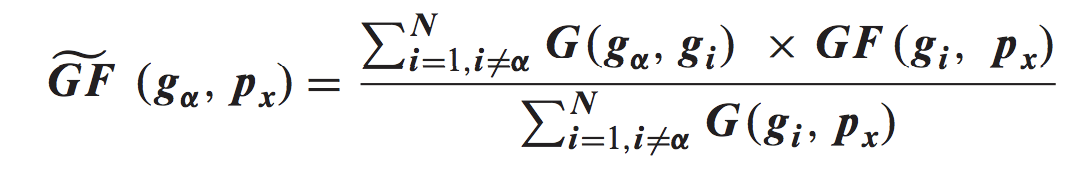

In other words, G is the TCGA correlation matrix and GF is the matrix of genes and phenotypes that have the mean correlations of a given gene to every other gene in a given set (the mouse gene set library). The goal is to be able to get the new gene set library GF' to make predictions about the TCGA dataset.

## Gathering variables 
Start by reloading the mouse gene set library, phenotypes and genes, and the TCGA correlation matrix and genes.

In [3]:
tcga = h5py.File("tcga.hdf5", "r+")
list(tcga.keys())

['correlation_matrix', 'data', 'full correlation matrix', 'meta']

In [4]:
tcga_cor = tcga['full correlation matrix']
data = tcga['data']
meta = tcga['meta']
tcga_genes = [ str(g[0])[2:-1] for g in meta['genes'] ]

In [10]:
# mat = np.matrix(tcga_cor)

In [7]:
# pd.DataFrame(mat)

,0,1,2,3,4,5,6,7,8,9,...,38540,38541,38542,38543,38544,38545,38546,38547,38548,38549
0,0.0,0.262705,0.146563,-0.052024,-0.129523,-0.490317,0.373983,0.295773,0.107526,-0.145855,...,0.096033,0.035084,-0.061891,0.002293,-0.555132,-0.064072,-0.427677,0.256407,-0.170670,0.213019
1,0.0,0.000000,0.005209,0.042536,-0.161579,-0.110125,-0.000063,0.090235,-0.132942,-0.077775,...,0.073116,0.114533,-0.036976,0.005529,-0.099380,-0.004547,-0.087962,0.057312,-0.064337,-0.039689
2,0.0,0.000000,0.000000,0.030339,0.431801,-0.198993,-0.051675,0.078487,0.160805,0.087144,...,-0.058577,-0.042107,0.057363,-0.004777,-0.028961,0.053367,-0.012854,-0.080124,0.060007,0.029730
3,0.0,0.000000,0.000000,0.000000,0.378185,-0.175095,0.055358,-0.188807,0.047830,0.404005,...,-0.084982,0.109807,-0.096555,0.114443,0.206958,0.245261,0.044526,-0.004867,-0.095129,-0.157619
4,0.0,0.000000,0.000000,0.000000,0.000000,-0.094998,-0.123320,-0.098898,0.206064,0.455420,...,0.010074,-0.042125,-0.002465,0.088070,0.242332,0.292551,0.152684,-0.204694,0.026181,-0.075879
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.032951,-0.023130,-0.039233,-0.094479,...,-0.063048,0.060391,0.008569,-0.086091,0.258012,-0.059802,0.187007,-0.307316,0.042301,-0.172765
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.144333,0.157931,-0.107453,...,0.033090,0.080204,-0.093992,-0.062817,-0.230429,0.023955,-0.226556,-0.067418,-0.224196,0.149277
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050894,-0.137997,...,0.115412,0.109176,0.108454,-0.016841,-0.291430,-0.024781,-0.025057,0.044899,0.027992,0.041311
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080774,...,-0.016743,0.028653,-0.028389,0.030328,0.065521,0.164200,0.029112,-0.100010,-0.037954,-0.106394
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.077405,0.030813,-0.132342,0.078464,0.300988,0.229321,0.037922,-0.099678,-0.121419,-0.165159


In [11]:
# Restore symmetric matrix
# for i in trange(len(mat)):
#     row = mat[i].T
#     mat[:, i] = row 

100%|██████████| 38550/38550 [01:04<00:00, 598.30it/s]


In [12]:
# pd.DataFrame(mat)

,0,1,2,3,4,5,6,7,8,9,...,38540,38541,38542,38543,38544,38545,38546,38547,38548,38549
0,0.000000,0.262705,0.146563,-0.052024,-0.129523,-0.490317,0.373983,0.295773,0.107526,-0.145855,...,0.096033,0.035084,-0.061891,0.002293,-0.555132,-0.064072,-0.427677,0.256407,-0.170670,0.213019
1,0.262705,0.000000,0.005209,0.042536,-0.161579,-0.110125,-0.000063,0.090235,-0.132942,-0.077775,...,0.073116,0.114533,-0.036976,0.005529,-0.099380,-0.004547,-0.087962,0.057312,-0.064337,-0.039689
2,0.146563,0.005209,0.000000,0.030339,0.431801,-0.198993,-0.051675,0.078487,0.160805,0.087144,...,-0.058577,-0.042107,0.057363,-0.004777,-0.028961,0.053367,-0.012854,-0.080124,0.060007,0.029730
3,-0.052024,0.042536,0.030339,0.000000,0.378185,-0.175095,0.055358,-0.188807,0.047830,0.404005,...,-0.084982,0.109807,-0.096555,0.114443,0.206958,0.245261,0.044526,-0.004867,-0.095129,-0.157619
4,-0.129523,-0.161579,0.431801,0.378185,0.000000,-0.094998,-0.123320,-0.098898,0.206064,0.455420,...,0.010074,-0.042125,-0.002465,0.088070,0.242332,0.292551,0.152684,-0.204694,0.026181,-0.075879
5,-0.490317,-0.110125,-0.198993,-0.175095,-0.094998,0.000000,0.032951,-0.023130,-0.039233,-0.094479,...,-0.063048,0.060391,0.008569,-0.086091,0.258012,-0.059802,0.187007,-0.307316,0.042301,-0.172765
6,0.373983,-0.000063,-0.051675,0.055358,-0.123320,0.032951,0.000000,0.144333,0.157931,-0.107453,...,0.033090,0.080204,-0.093992,-0.062817,-0.230429,0.023955,-0.226556,-0.067418,-0.224196,0.149277
7,0.295773,0.090235,0.078487,-0.188807,-0.098898,-0.023130,0.144333,0.000000,0.050894,-0.137997,...,0.115412,0.109176,0.108454,-0.016841,-0.291430,-0.024781,-0.025057,0.044899,0.027992,0.041311
8,0.107526,-0.132942,0.160805,0.047830,0.206064,-0.039233,0.157931,0.050894,0.000000,0.080774,...,-0.016743,0.028653,-0.028389,0.030328,0.065521,0.164200,0.029112,-0.100010,-0.037954,-0.106394
9,-0.145855,-0.077775,0.087144,0.404005,0.455420,-0.094479,-0.107453,-0.137997,0.080774,0.000000,...,-0.077405,0.030813,-0.132342,0.078464,0.300988,0.229321,0.037922,-0.099678,-0.121419,-0.165159


In [16]:
# tcga.create_dataset("full correlation matrix", data=mat)

<HDF5 dataset "full correlation matrix": shape (38550, 38550), type "<f8">

# Filling in new gene set library
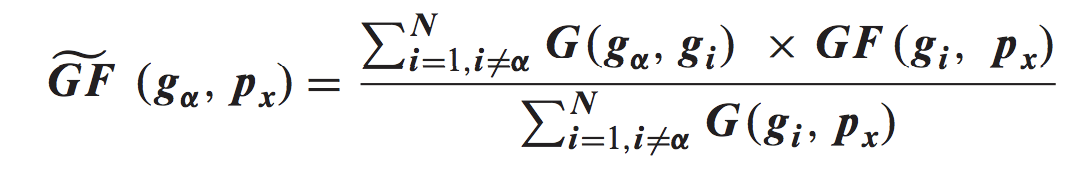

For each gene in TCGA genes for each phenotype, sum the correlation with every other gene multiplied by its correlation to the mouse gene set function, and divide the total by the correlations of the genes to the gene set function. This can be calculated by creating a new mouse gene set library that had all of the TCGA genes as rows in order, so that we may perform a dot product for the numerator and a summation in the denominator. Since self-correlations had been set to 0 in the correlation matrix, we can still dot each row of the correlation matrix with each col of the gene set library matrix to get the numerator, and the self-correlation would negate its product. For the denominator, we can sum the gene set library row but subtract the entry for the current gene.

In [5]:
fil = h5py.File("auc_data.hdf5", "r+")
data = fil['data']
meta = fil['meta']
list(data.keys())

['go_bp_bin_mat',
 'go_bp_gslib',
 'kegg_bin_mat',
 'kegg_gslib',
 'mgi_bin_mat',
 'mgi_gslib',
 'tcga_go_bp_gslib',
 'tcga_kegg_gslib',
 'tcga_mgi_gslib']

In [10]:
# meta.create_dataset(curr_name + "pheno", data=pd.DataFrame(curr_pheno).astype("S"))
curr_pheno = meta[curr_name + "pheno"]
curr_pheno = [ str(p[0])[2:-1] for p in curr_pheno ]

In [11]:
curr_gslib = data[curr_name + "gslib"]

In [11]:
binary_matrix = data[curr_name + "bin_mat"]

In [34]:
"""
Expanded mouse gene set library with the same number of genes as the TCGA gene set.
We should ignore the ~3400 mouse genes not found in the TCGA gene set since they won't 
be included in the above calculations.
"""

ex_mgsl = np.zeros((len(tcga_genes), len(curr_pheno)))

In [35]:
# TCGA gene to index dictionary to help fill in expanded mouse gene set library 
tcga_to_idx = {} 
for i in range(len(tcga_genes)): 
    g = tcga_genes[i]
    tcga_to_idx[g] = i

In [36]:
"""
Loop through the current mouse gene names. If the mouse gene name is found in the tcga_to_idx
dictionary, we find its index according to the TCGA gene list and replace the ex_mgsl row of 
zeros with the row found in the previous mouse gene set library. All of the genes found in the
TCGA library but not in the mouse gene set library will be left as zero for phenotype correlations.
"""
for m in range(len(curr_genes)): 
    curr_gene = curr_genes[m]
    if curr_gene in tcga_to_idx:
        idx = tcga_to_idx[curr_gene]
        ex_mgsl[idx] = curr_gslib[m]  # replace expanded mgsl row with the prev mgsl row of correlations

In [37]:
ex_mgsl.shape

(38550, 308)

In [38]:
"""
We can compute the numerator part of the matrix by multiplying matrices together.
Use Numpy rather than go through matrix manually b/c np probably has some speedy
magic we don't know about.
"""

gslib = np.matmul(tcga_cor, ex_mgsl)

In [39]:
# Check to get a new matrix with TCGA genes as rows and phenotypes of columns
gslib.shape

(38550, 308)

In [40]:
"""
To finish computing the gene set library we have to go through each of the entries and divide
by the sum of the correlations in that phenotype's set (minus the current gene's correlation).
We can speed up computations by just taking the sums of each phenotype column. As we loop 
through the genes for each phenotype, we can just subtract the current gene's correlation
from the phenotype's sum.
"""

pheno_sums = []
for col in np.transpose(curr_gslib):
    pheno_sums.append(sum(col))

for i in trange(len(gslib)):
    for j in range(len(curr_pheno)):
        sub = ex_mgsl[i][j]
        denom = pheno_sums[j]
        gslib[i][j] = gslib[i][j]/(denom-sub)

100%|██████████| 38550/38550 [00:25<00:00, 1509.60it/s]


In [41]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import norm
from matplotlib import pyplot

In [42]:
common_genes = list(set(tcga_genes) & set(curr_genes))

In [43]:
auc_list = []
for g in range(len(curr_genes)):
    y_true = binary_matrix[g]
    y_probs = curr_gslib[g]
    auc = roc_auc_score(y_true, y_probs)
    auc_list.append(auc)
np.mean(auc_list)

0.37203567847364755

In [22]:
auc_list = []
for g in trange(len(curr_pheno)):
    y_true = binary_matrix[:, g]
    y_probs = curr_gslib[:, g]
    auc = roc_auc_score(y_true, y_probs)
    auc_list.append(auc)
np.mean(auc_list)

100%|██████████| 308/308 [00:04<00:00, 68.57it/s]


1.0

In [23]:
auc_list = []
for g in common_genes:
    tcga_idx = tcga_to_idx[g]
    mgi_idx = np.where(np.transpose(curr_genes) == g)[0][0]
    y_true = binary_matrix[mgi_idx]
    y_probs = gslib[tcga_idx]
    # calculate AUC
    auc = roc_auc_score(y_true, y_probs)
    auc_list.append(auc)

In [24]:
np.unique(auc_list, return_counts=True)[0]

array([0.00325733, 0.00977199, 0.01302932, ..., 0.99875   , 0.9989071 ,
       1.        ])

In [25]:
np.mean(auc_list)

0.7361057806814884

In [26]:
common_idx = [ tcga_to_idx[g] for g in common_genes ]
common_binary_idx = [ np.where(np.transpose(curr_genes) == g)[0][0] for g in common_genes ]
smaller_gslib = pd.DataFrame(gslib).iloc[common_idx]
smaller_binary = pd.DataFrame(binary_matrix).iloc[common_binary_idx]
pheno_auc = []
for p in trange(len(curr_pheno)):
    y_true = smaller_binary.loc[:, p]
    y_probs = smaller_gslib.loc[:, p]
    auc = roc_auc_score(y_true, y_probs)
    pheno_auc.append(auc)

100%|██████████| 308/308 [00:01<00:00, 273.19it/s]


In [27]:
np.mean(pheno_auc)

0.7280695862050343

In [29]:
fil = h5py.File("auc_data.hdf5", "r+")
data = fil['data']
meta = fil['meta']

In [28]:
# meta.create_dataset("tcga_genes", data=pd.DataFrame(tcga_genes).astype("S"))
# meta.create_dataset(curr_name + "genes", data=pd.DataFrame(curr_genes).astype("S"))
# del data["tcga_" + curr_name + "gslib"]
# data.create_dataset(curr_name + "gslib", data=curr_gslib)
# data.create_dataset(curr_name + "bin_mat", data=binary_matrix)
# data.create_dataset("tcga_" + curr_name + "gslib", data=gslib)
# fil.close()

In [30]:
print(list(data.keys()))
print(list(meta.keys()))

['go_bp_bin_mat', 'go_bp_gslib', 'kegg_bin_mat', 'kegg_gslib', 'mgi_bin_mat', 'mgi_gslib', 'tcga_go_bp_gslib', 'tcga_kegg_gslib', 'tcga_mgi_gslib']
['go_bp_genes', 'go_bp_pheno', 'kegg_genes', 'kegg_pheno', 'mgi_genes', 'mgi_pheno', 'tcga_genes']


In [65]:
tcga_go_bp_gslib = data['tcga_go_bp_gslib']
tcga_genes = [ str(g[0])[2:-1] for g in meta['tcga_genes'] ]
curr_genes = [ str(g[0])[2:-1] for g in meta['go_bp_genes'] ]
curr_pheno = [ str(p[0])[2:-1] for p in meta['go_bp_pheno'] ]

In [39]:
fil.close()

In [66]:
common = list(set(tcga_genes) & set(curr_genes))

In [67]:
pd.DataFrame(np.matrix(tcga_go_bp_gslib))

,0,1,2,3,4,5,6,7,8,9,...,5093,5094,5095,5096,5097,5098,5099,5100,5101,5102
0,0.063101,-0.018475,0.141344,-0.054543,-0.065946,-0.037034,0.099344,0.002419,0.006763,0.101746,...,0.119864,0.030656,-0.018222,-0.160504,-0.092853,0.057592,0.076516,0.124876,0.038543,0.002312
1,-0.024989,-0.052890,0.081440,-0.075333,-0.056918,-0.045109,0.040233,-0.004363,-0.042959,0.008888,...,-0.033261,0.001808,-0.023239,-0.063260,-0.025451,-0.026206,0.018967,0.015224,0.037586,-0.044570
2,-0.001292,0.087623,-0.075735,0.165228,0.007572,0.126377,-0.085379,-0.036476,0.010388,0.139947,...,0.017937,0.064256,0.000903,0.006739,-0.042547,-0.039658,0.110268,-0.005894,0.039797,0.150021
3,0.118145,0.029612,-0.046040,0.052707,0.063813,0.069260,-0.065167,-0.008285,-0.009584,0.070232,...,0.137597,-0.037263,0.000536,0.036046,-0.122528,-0.058945,0.033257,-0.009698,0.017283,0.050174
4,0.058842,0.194666,-0.118318,0.230695,0.101852,0.229855,-0.124551,-0.057751,-0.005445,0.099154,...,0.049520,0.063896,0.045474,0.068694,-0.029147,-0.014221,0.119532,-0.030234,0.003040,0.188907
5,-0.084182,-0.050150,0.002430,-0.059219,-0.025976,-0.055137,-0.006110,0.000998,-0.002956,-0.085532,...,-0.111399,-0.047414,0.085093,0.077024,0.149382,-0.013908,-0.116760,0.103466,0.008347,-0.115991
6,0.057184,-0.053767,0.194155,-0.138711,-0.067087,-0.078489,0.087548,-0.002051,-0.059156,0.008735,...,0.092207,-0.013559,0.055561,-0.073397,0.056801,-0.002856,-0.047012,0.266906,0.045366,-0.122052
7,-0.115066,-0.043188,0.026053,-0.039958,-0.096845,-0.050157,0.027715,0.010238,0.028670,0.000190,...,-0.127992,0.058840,-0.043426,-0.093347,-0.064159,0.010560,0.075894,0.145628,0.002183,0.024161
8,0.053245,0.030119,0.007607,0.035925,-0.007243,0.071531,-0.024075,-0.012957,-0.044721,0.063415,...,0.018975,0.058430,-0.019257,0.001721,-0.035143,-0.032035,0.038217,0.081954,0.048864,0.052879
9,0.166767,0.116056,-0.100639,0.129462,0.099757,0.150846,-0.062409,-0.007609,0.016558,0.080605,...,0.130181,-0.019402,0.029718,0.106025,-0.027912,-0.014940,0.046370,-0.068500,0.011958,0.101349


In [69]:
common[0]

'KLF1'